In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
datos = "/Users/fabiana/Downloads/obes-phys-acti-diet-eng-2014-tab.xls"

# Exploración de Datos

In [3]:
#Información a analizar 
obesidad = pd.read_excel(datos,'7.2',header=4,usecols="A:J",nrows=11)
obesidad


,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [4]:
#Eliminaré datos NaN
obesidad = obesidad.drop(index = obesidad.index[0:1], axis=0)
obesidad


,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


El DataFrame presenta registros hospitalarios de diagnósticos iniciales de obesidad clasificados por edades a lo largo de una década. Destaca un significativo aumento anual en la fila Total, alcanzando un crecimiento de hasta 10 veces en nueve años. En 2011, el rango de edad de 45-54 registró el mayor número de diagnósticos, mientras que los menores de 16 años mostraron una ligera tendencia a la baja. Notablemente, en 2008/09, se observa un incremento de hasta el doble en algunas edades, posiblemente relacionado con la Crisis Financiera que trajo consigo malos hábitos alimenticios inducidos por el estrés y la depresión.

# Visualización de Datos

In [5]:
# Renombramos columnas
obesidad.rename({'Unnamed: 0': 'Anyo'}, axis=1, inplace=True)

# Separar 'Anyo' en 'Año' y 'Mes'
obesidad[['Año', 'Mes']] = obesidad['Anyo'].str.split('/', expand=True)

# Eliminar la antigua columna 'Anyo'
obesidad.drop('Anyo', axis=1, inplace=True)


# Muestro el resultado
obesidad.head()


,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over,Año,Mes
1,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0,2002,03
2,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0,2003,04
3,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0,2004,05
4,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0,2005,06
5,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0,2006,07


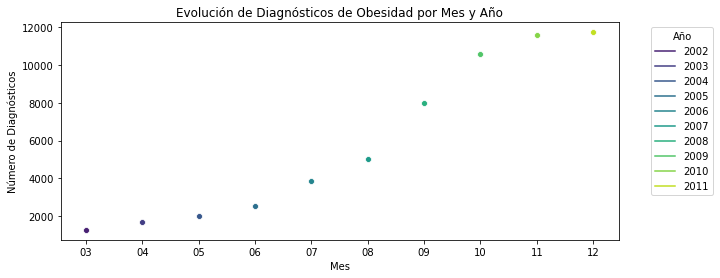

In [6]:
# Gráfico de líneas para mostrar la evolución
plt.figure(figsize=(10, 4))
sns.lineplot(x='Mes', y='Total', hue='Año', data=obesidad, marker='o', palette='viridis')
plt.title('Evolución de Diagnósticos de Obesidad por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Número de Diagnósticos')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

La gráfica a continuación representa el aumento de los casos registrados con indicios de obesidad a lo largo de 10 años, mostrando claramente una línea de crecimiento. Como mencionamos anteriormente, en algunos años se observa un incremento de hasta el doble, destacándose un mayor crecimiento en el segmento de 35 a 54 años.

# Método de Pearson

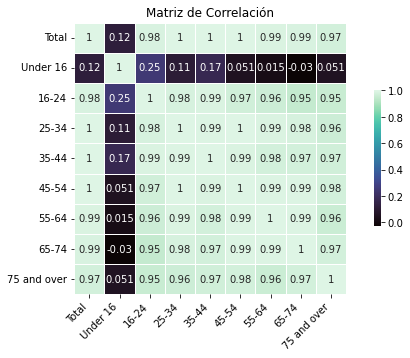

In [7]:
# Calcular la matriz de correlación
corr1 = obesidad.corr(method='pearson')

# Crear un mapa de calor
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr1, annot=True, cmap='mako', square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

# Ajustar la posición de los nombres de las columnas para evitar solapamientos
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

## Gráfica de Líneas

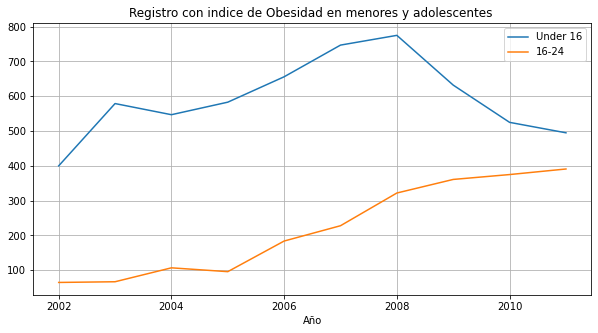

In [8]:
#En la siguiente gráfica, mostraré el segmento de niños y adolescentes
obesidad.plot(x='Año',y=['Under 16','16-24'], kind='line',figsize=(10,5))
#En el rango de edades, sólo voy a considerar las edades indicadas, no incluiré el grupo siguiente ('25-34')
plt.legend()
plt.grid(True)
plt.title('Registro con indice de Obesidad en menores y adolescentes ')
plt.show()


# Conclusiones: 

Al analizar la gráfica, nos preguntamos cuál de los segmentos muestra un aumento más significativo. A primera vista, "Under 16" parece destacar, pero al considerar la cantidad inicial de casos, notamos que el segmento "16-24" experimenta un crecimiento proporcionalmente mayor. Por ejemplo, en 2002/03, "Under 16" tuvo 400 casos y "16-24" solo 65. En 2011/12, "Under 16" registró 356 casos y "16-24" 556. Aunque la gráfica facilita la visualización, es crucial interpretarla con objetividad y entender el propósito del análisis.